In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
%matplotlib inline
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus=False)

In [2]:
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

# Set font family globally
mpl.rcParams['font.family'] = 'NanumMyeongjo'
print(mpl.rcParams['font.family'])


Nanum Pen Script
NanumGothicOTF Eco
NanumSquare_ac
Nanum Brush Script OTF
NanumSquare_ac
NanumSquare
NanumMyeongjoOTF
NanumSquare Neo OTF Regular
NanumBarunGothic YetHangul
NanumGothic Eco
Nanum Pen Script OTF
NanumSquareRoundOTF
NanumGothic
NanumGothicOTF
NanumBarunGothicOTF
NanumSquare Neo ExtraBold
Nanum Brush Script
NanumGothic
NanumBarunGothicOTF
NanumSquare
NanumSquareOTF
NanumSquare_ac
NanumSquareRoundOTF
NanumSquareOTF_ac
NanumMyeongjoOTF Eco
NanumSquare
D2Coding ligature
NanumBarunGothic
D2Coding ligature
Noto Sans KR
NanumSquareRoundOTF
NanumSquare Neo OTF Bold
NanumGothic Eco
NanumBarunGothic
NanumGothicOTF Eco
NanumSquare Neo Regular
NanumSquareOTF
NanumSquareRoundOTF
Noto Sans KR
NanumSquareOTF
NanumBarunpen
Noto Sans KR
NanumSquareRound
NanumBarunpenOTF
NanumBarunGothic
NanumMyeongjo YetHangul
NanumBarunGothicOTF
Noto Sans KR
NanumGothicOTF
D2Coding ligature
NanumMyeongjo Eco
NanumBarunGothic
NanumSquareOTF_ac
NanumSquareRound
NanumBarunGothicOTF YetHangul
NanumSquareRoun

In [3]:
%pwd

'C:\\python'

C:\Users\jaehee\AppData\Local\Temp\ipykernel_11524\950508066.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


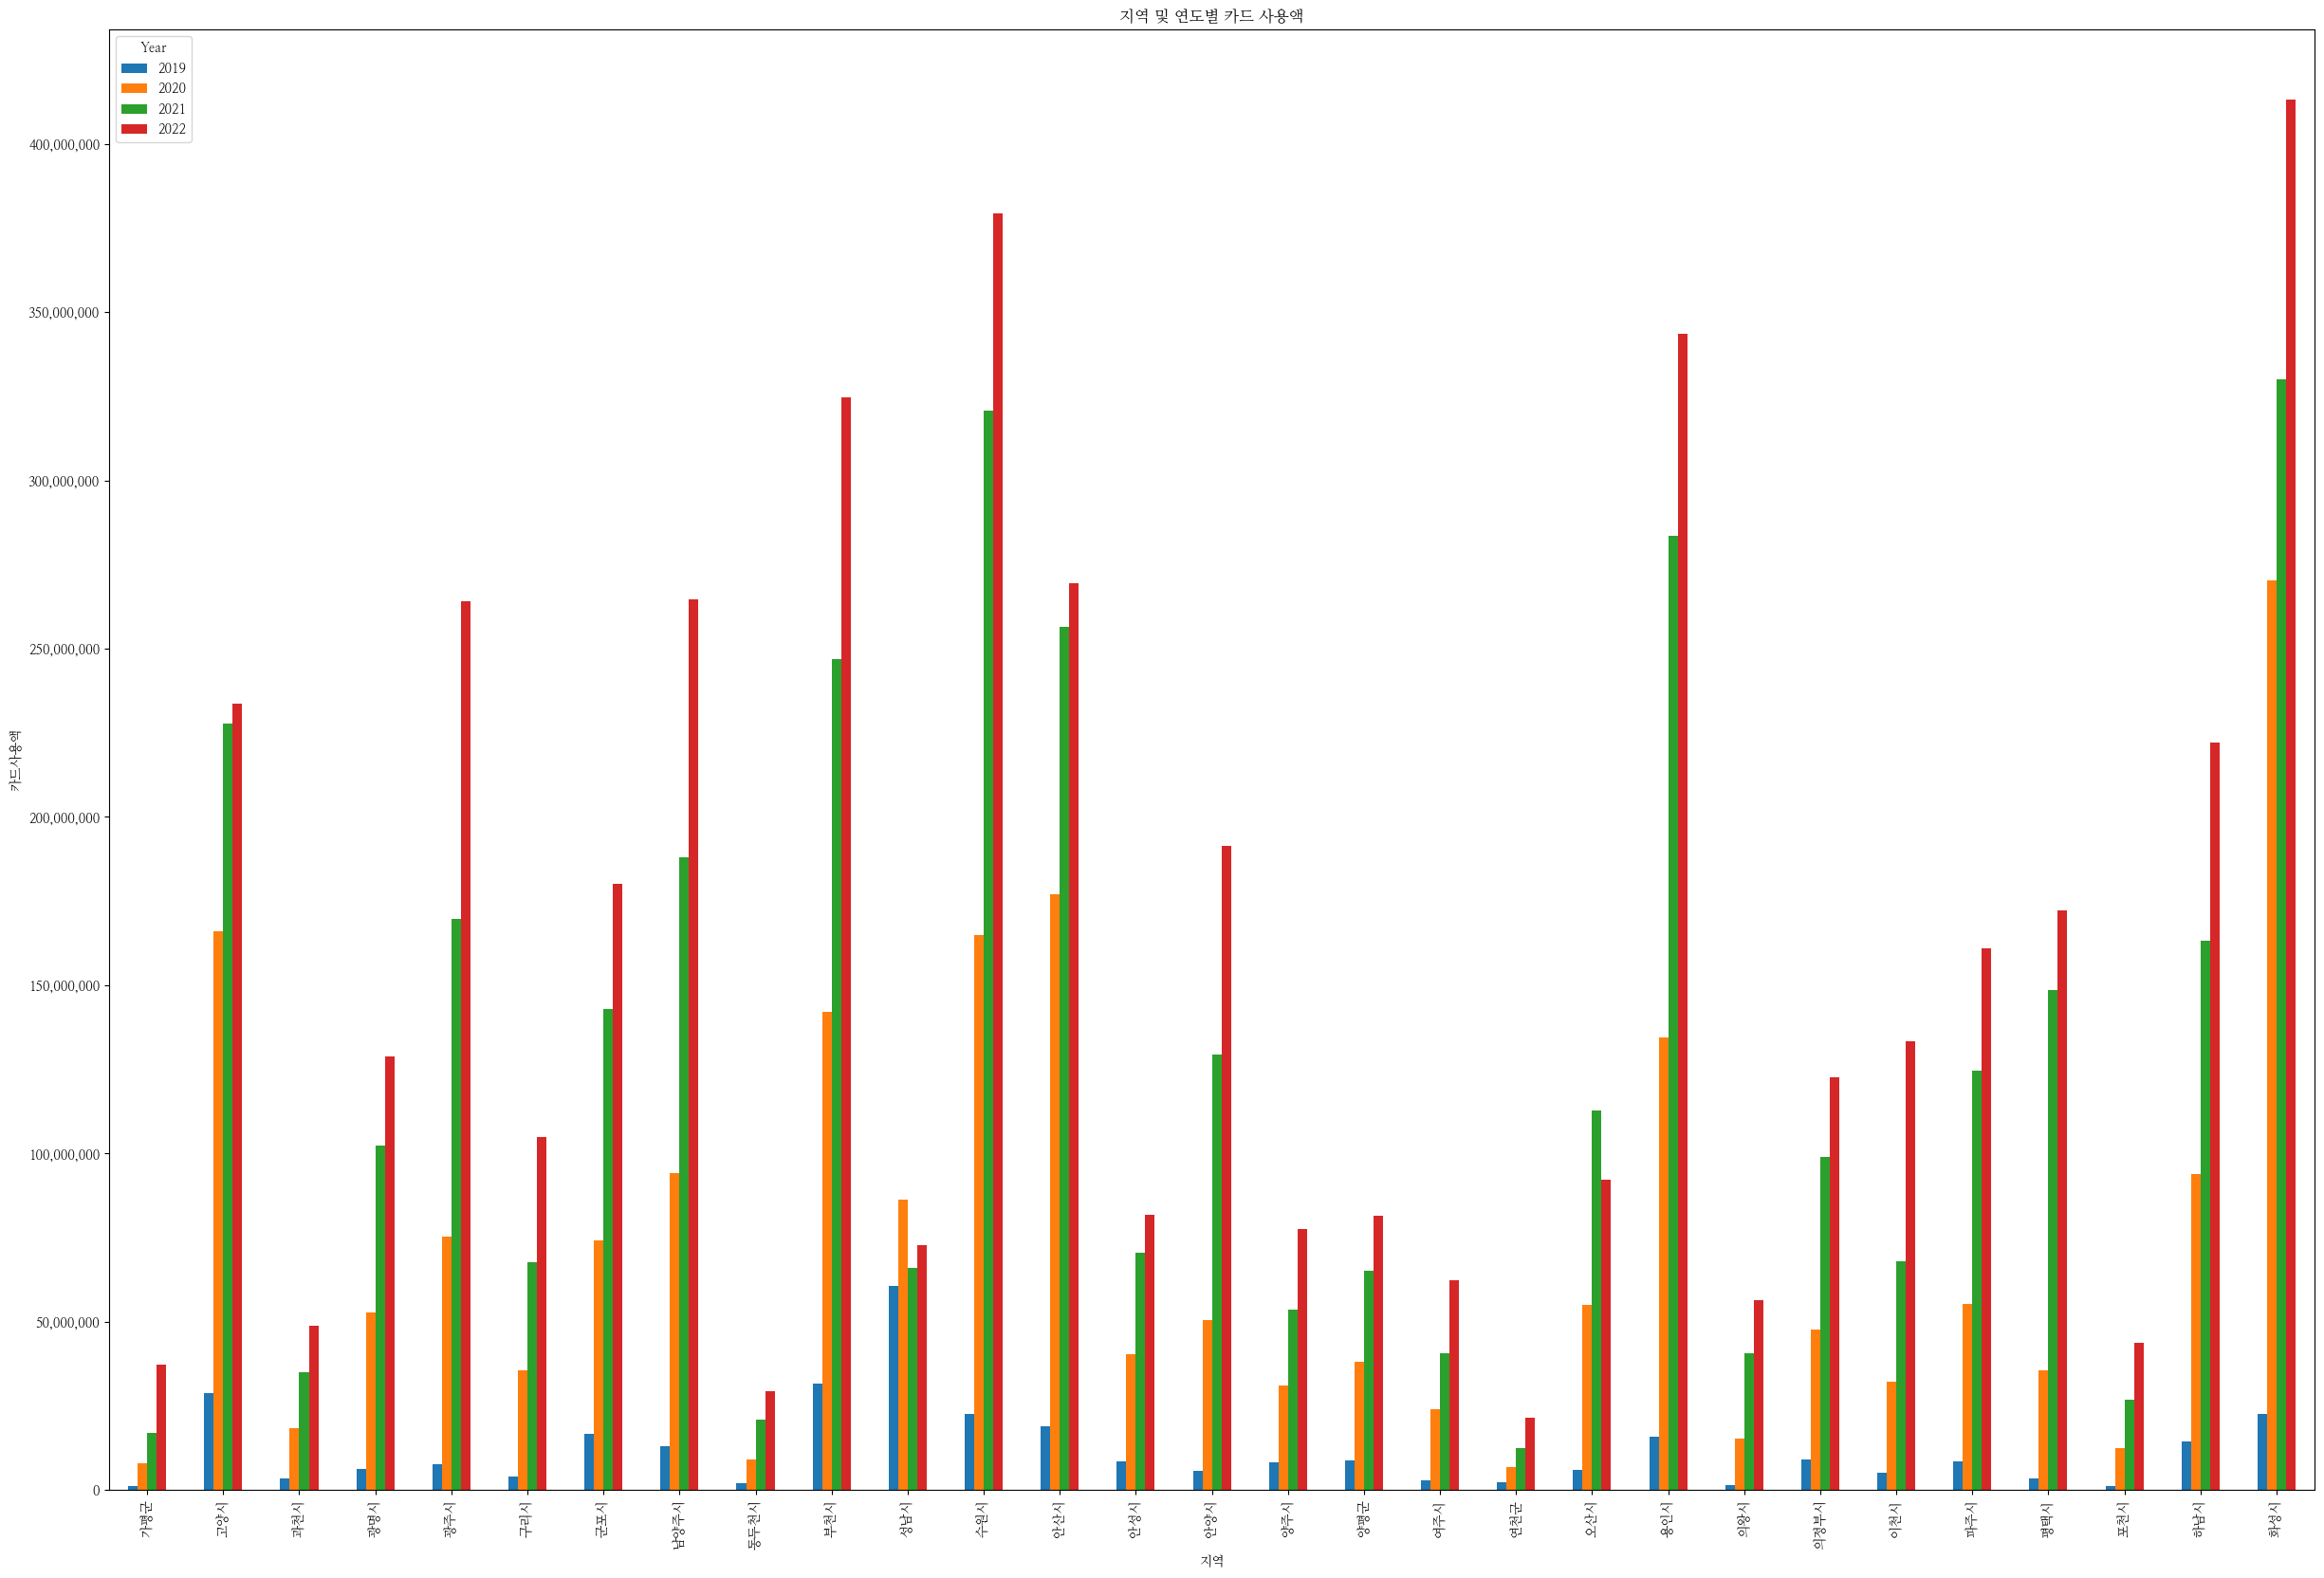

In [5]:
local_g = pd.read_csv('datas/지역화폐발행및이용현황.csv', encoding='CP949', low_memory=False)
local_g = local_g.drop(['월별모바일상품권이용등록자수(명)', '월별모바일충전액(천원)', '월별모바일사용액(천원)', '월별지류상품권판매액(천원)', '월별지류상품권회수액(천원)'], axis=1)

local_g['기준년월'] = local_g['기준년월'].str.split('-').str[0] 

local_g1 = local_g.groupby(['시군명', '기준년월']).sum()
local_g1 = local_g1.drop(['월별카드발행수량(건)', '월별카드충전액(천원)'], axis=1)

# 도시별 년도별 총 사용량으로 나눔
temp3 = local_g1.reset_index()
pivot_temp = pd.pivot_table(temp3,
               index = "시군명",
               columns = "기준년월",
               values = "월별카드사용액(천원)")
pivot_temp

temp4 = pivot_temp.reset_index()
temp4.drop([7, 13], inplace=True)
temp4

ax = temp4.plot(x='시군명', kind='bar', figsize=(30, 20), rot=0)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# x, y축 레이블, 그래프 제목 설정

ax.set_xlabel('지역')
ax.set_ylabel('카드사용액')
ax.set_title('지역 및 연도별 카드 사용액')

plt.xticks(rotation=90)



# 범례 추가
ax.legend(title='Year')

plt.show()


In [8]:
local_m = pd.read_csv('datas/지역화폐가맹점(20230228기준).csv', encoding='CP949', low_memory=False)
local_a =pd.read_csv('datas/지역화폐연령별성별이용현황.csv', encoding='CP949', low_memory=False)
local_g = pd.read_csv('datas/지역화폐발행및이용현황.csv', encoding='CP949', low_memory=False)

In [9]:
local_22 = local_g[local_g['기준년월'] > '2022']  ## 22년도 경기도 자료
local_21 = local_g[local_g['기준년월'] > '2021'] 
local_21 = local_21[local_21['기준년월'] < '2022']  ## 21년도 경기도 자료
local_20 = local_g[local_g['기준년월'] > '2020']
local_20 = local_20[local_20['기준년월'] < '2021']  ## 20년도 경기도 자료
local_19 = local_g[local_g['기준년월'] > '2019']
local_19 = local_19[local_19['기준년월'] < '2020']  ## 19년도 경기도 자료

total_19 = local_19[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()
total_20 = local_20[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()
total_21 = local_21[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()
total_22 = local_22[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()

total_19
print(total_21)
total_21

월별카드발행수량(건)    2.657822e+06
월별카드충전액(천원)    3.709852e+09
월별카드사용액(천원)    3.629994e+09
dtype: float64


월별카드발행수량(건)    2.657822e+06
월별카드충전액(천원)    3.709852e+09
월별카드사용액(천원)    3.629994e+09
dtype: float64

In [10]:
# 지역화폐발행및이용현황.csv 파일에서 필요없는 컬럼 삭제하고 카드 자료만 남김
local_g = local_g.drop(['월별모바일상품권이용등록자수(명)', '월별모바일충전액(천원)', '월별모바일사용액(천원)', '월별지류상품권판매액(천원)', '월별지류상품권회수액(천원)'], axis=1)

In [11]:
Gapyeong = local_g[local_g['시군명'] == '가평군']  #  가평군 자료
Goyang = local_g[local_g['시군명'] == '고양시']  #  고양시 자료
Gwacheon = local_g[local_g['시군명'] == '과천시']  #  과천시 자료
Gwangmyeong = local_g[local_g['시군명'] == '광명시']  #  광명시 자료
Gwangju = local_g[local_g['시군명'] == '광주시']  #  광주시 자료
Guri = local_g[local_g['시군명'] == '구리시']  #  광주시 자료
Gunpo = local_g[local_g['시군명'] == '군포시']  #  군포시 자료
Gimpo = local_g[local_g['시군명'] == '김포시']  #  김포시 자료
Namyangju = local_g[local_g['시군명'] == '남양주시']  #  남양주시 자료

Dongducheon = local_g[local_g['시군명'] == '동두천시']  #  동두천시 자료
Bucheon = local_g[local_g['시군명'] == '부천시']  #  부천시 자료
Seongnam = local_g[local_g['시군명'] == '성남시']  #  성남시 자료
Suwon = local_g[local_g['시군명'] == '수원시']  #  수원시 자료
Siheung = local_g[local_g['시군명'] == '시흥시']  #  시흥시 자료
Ansan = local_g[local_g['시군명'] == '안산시']  #  안산시 자료
Anseong = local_g[local_g['시군명'] == '안성시']  #  안성시 자료
Anyang = local_g[local_g['시군명'] == '안양시']  #  안양시 자료
Yangju = local_g[local_g['시군명'] == '양주시']  #  양주시 자료

Yangpyeong = local_g[local_g['시군명'] == '양평군']  #  양평군 자료
Yeoju = local_g[local_g['시군명'] == '여주시']  #  여주시 자료
Yeoncheon = local_g[local_g['시군명'] == '연천군']  #  연천군 자료
Ohsan = local_g[local_g['시군명'] == '오산시']  #  오산시 자료
Yongin = local_g[local_g['시군명'] == '용인시']  #  용인시 자료
Uiwang = local_g[local_g['시군명'] == '의왕시']  #  의왕시 자료
Uijeongbu = local_g[local_g['시군명'] == '의정부시']  #  의정부시 자료
Icheon = local_g[local_g['시군명'] == '이천시']  #  이천시 자료
Paju = local_g[local_g['시군명'] == '파주시']  #  파주시 자료

Pyeongtaek = local_g[local_g['시군명'] == '평택시']  #  평택시 자료
Pocheon = local_g[local_g['시군명'] == '포천시']  #  포천시 자료
Hanam = local_g[local_g['시군명'] == '하남시']  #  하남시 자료
Hwaseong  = local_g[local_g['시군명'] == '화성시']  #  화성시 자료


In [12]:
local_g['기준년월'] = local_g['기준년월'].str.split('-').str[0] 

local_g1 = local_g.groupby(['시군명', '기준년월']).sum()
local_g1 = local_g1.drop(['월별카드발행수량(건)', '월별카드충전액(천원)'], axis=1)
local_g1

월별카드사용액(천원)
시군명 기준년월             
가평군 2019    1163080.0
    2020    7838598.0
    2021   17090192.0
    2022   37295334.0
고양시 2019   28739326.0
...               ...
하남시 2022  222027665.0
화성시 2019   22496907.0
    2020  270290214.0
    2021  329956017.0
    2022  413288098.0

[124 rows x 1 columns]

In [13]:
# 도시별 년도별 총 사용량으로 나눔
temp3 = local_g1.reset_index()
pivot_temp = pd.pivot_table(temp3,
               index = "시군명",
               columns = "기준년월",
               values = "월별카드사용액(천원)")
pivot_temp

temp4 = pivot_temp.reset_index()
temp4.drop([7, 13], inplace=True)
temp4

기준년월,시군명,2019,2020,2021,2022
0,가평군,1163080.0,7838598.0,17090192.0,37295334.0
1,고양시,28739326.0,165952369.0,227763309.0,233629399.0
2,과천시,3321976.0,18277683.0,34990151.0,48901935.0
3,광명시,6372380.0,52619450.0,102319815.0,128884694.0
4,광주시,7557041.0,75327338.0,169707917.0,264018232.0
5,구리시,4011320.0,35658236.0,67749794.0,104856810.0
6,군포시,16642604.0,74169504.0,142795935.0,180159645.0
8,남양주시,12979396.0,94044048.0,187900637.0,264578012.0
9,동두천시,2106819.0,8998356.0,20767173.0,29409195.0
10,부천시,31543254.0,142099351.0,246942642.0,324609192.0


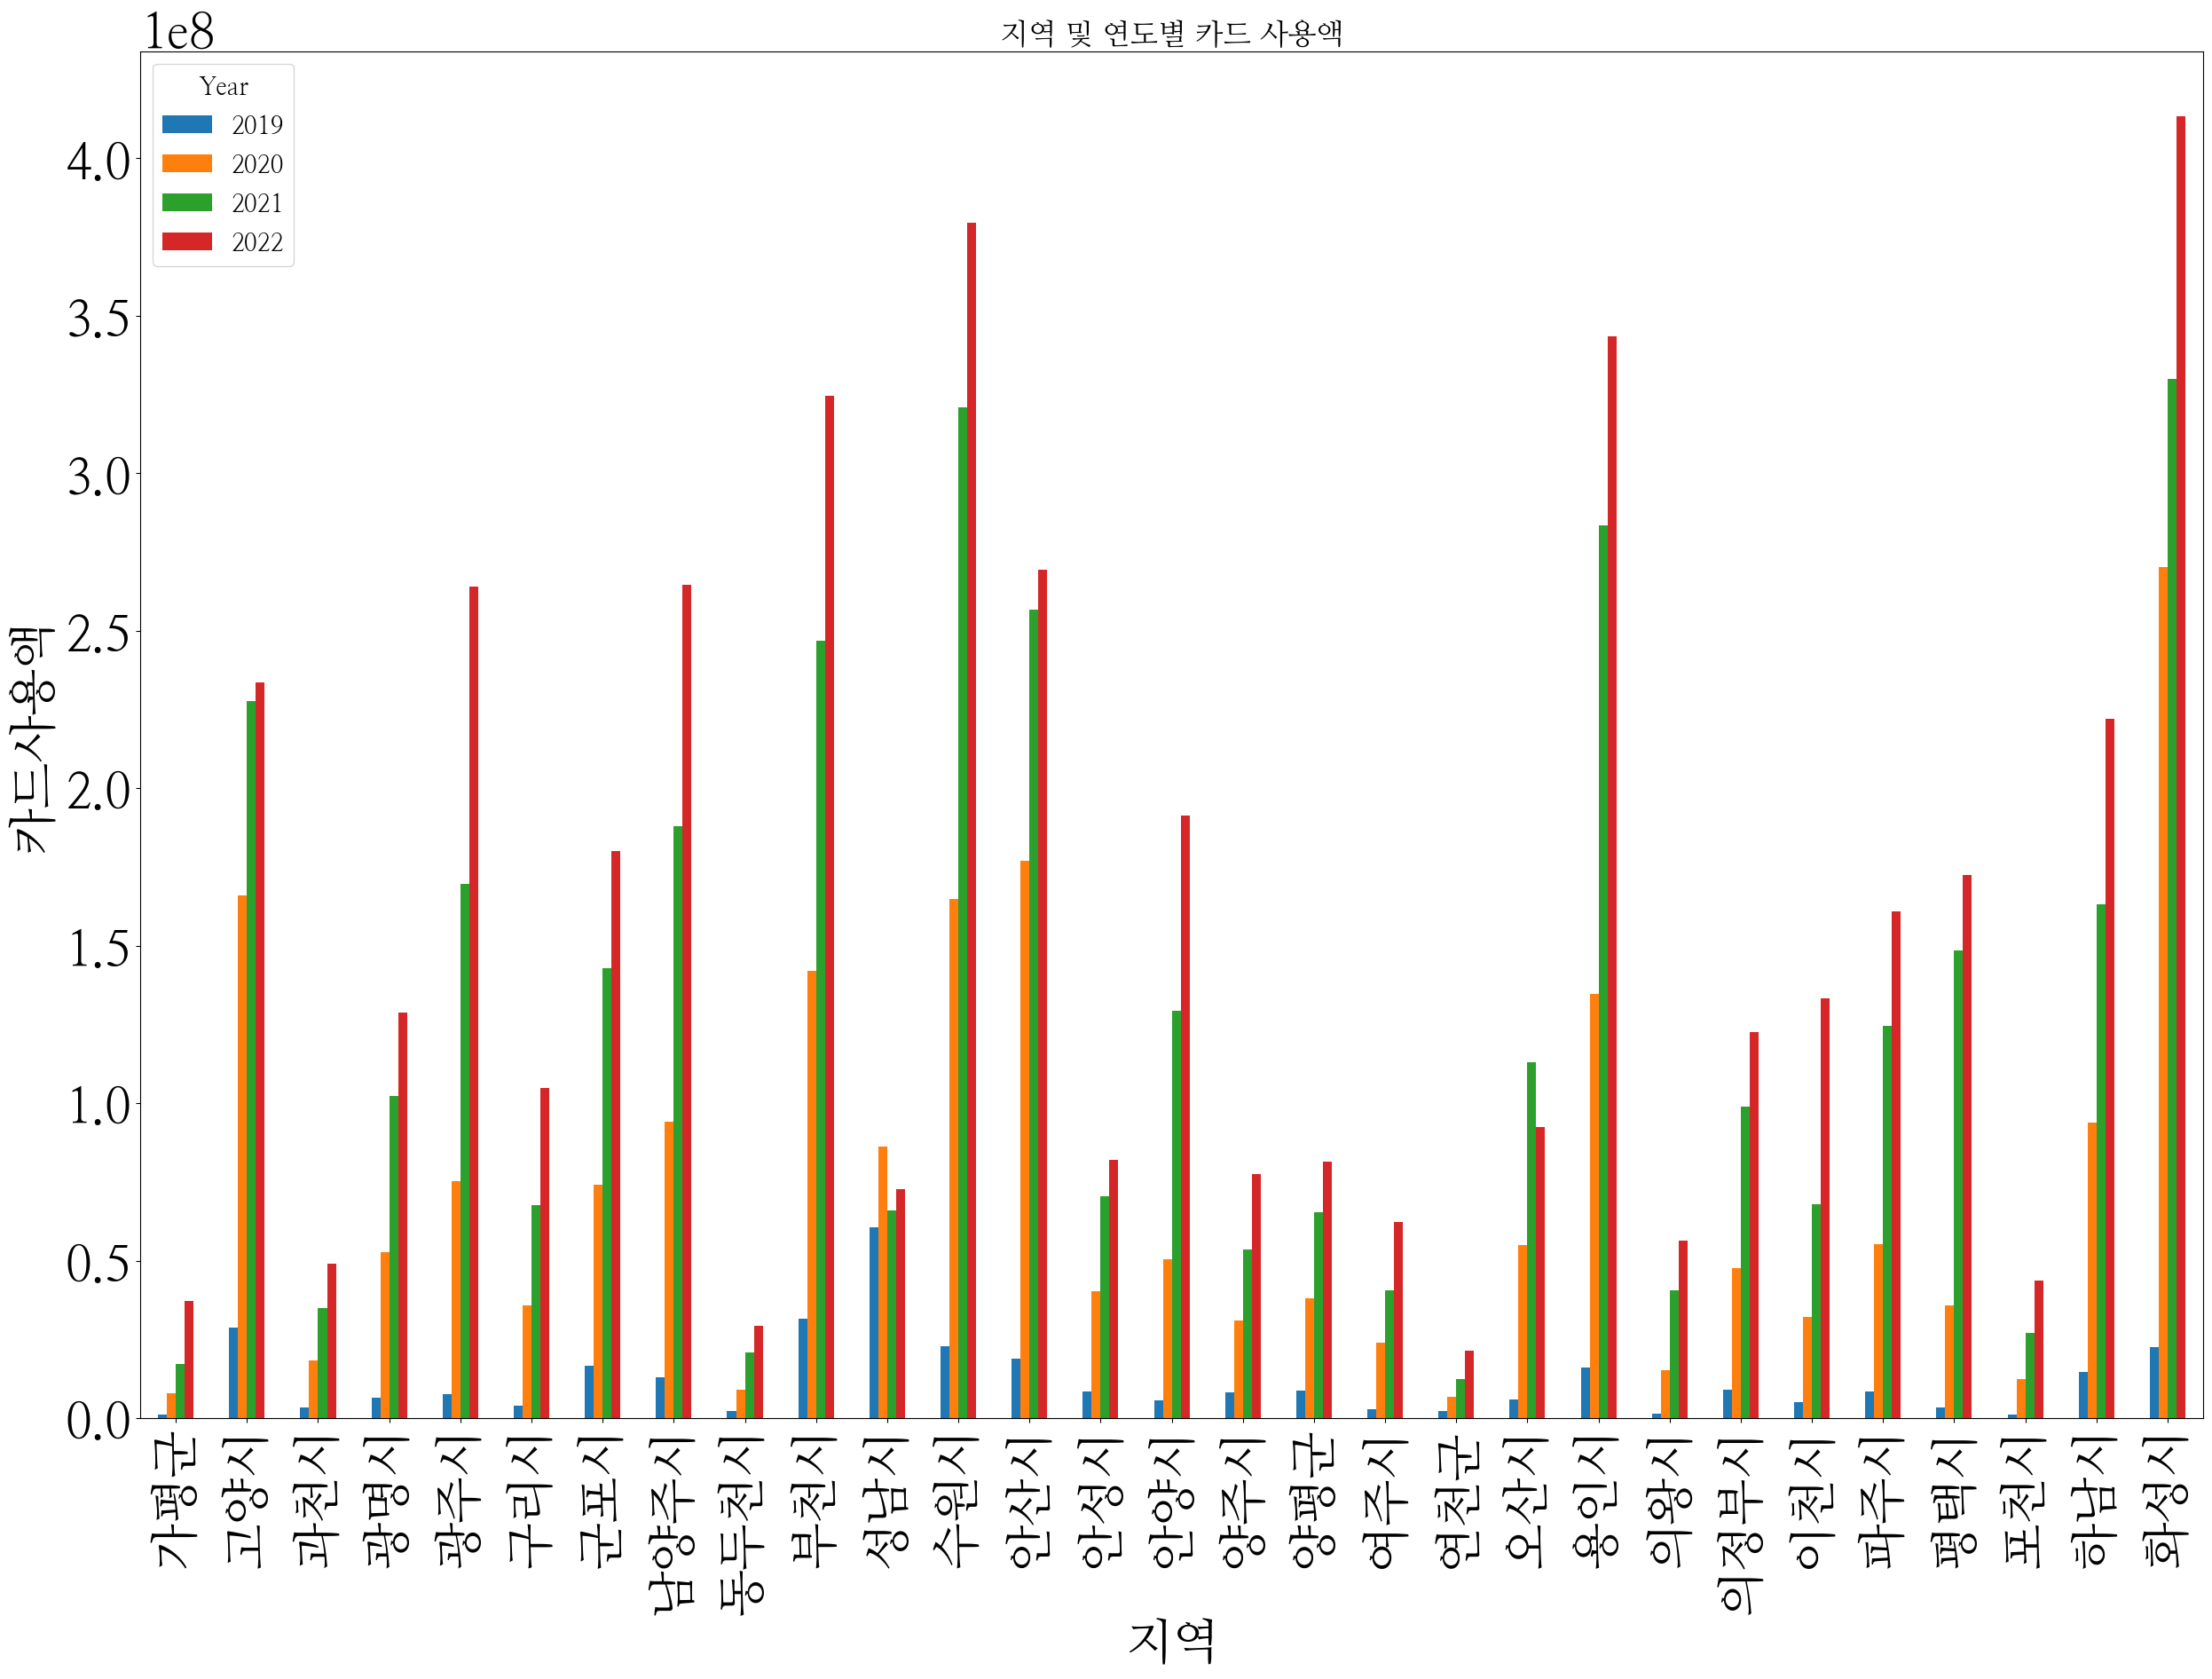

In [14]:
ax = temp4.plot(x='시군명', kind='bar', figsize=(30, 20), rot=0)

# x, y축 레이블, 그래프 제목 설정

ax.set_xlabel('지역')
ax.set_ylabel('카드사용액')
ax.set_title('지역 및 연도별 카드 사용액')

plt.xticks(rotation=90)



# 범례 추가
ax.legend(title='Year')

plt.show()

In [15]:
temp4 = pivot_temp.reset_index()
temp4.drop([7, 13], inplace=True)
temp4

기준년월,시군명,2019,2020,2021,2022
0,가평군,1163080.0,7838598.0,17090192.0,37295334.0
1,고양시,28739326.0,165952369.0,227763309.0,233629399.0
2,과천시,3321976.0,18277683.0,34990151.0,48901935.0
3,광명시,6372380.0,52619450.0,102319815.0,128884694.0
4,광주시,7557041.0,75327338.0,169707917.0,264018232.0
5,구리시,4011320.0,35658236.0,67749794.0,104856810.0
6,군포시,16642604.0,74169504.0,142795935.0,180159645.0
8,남양주시,12979396.0,94044048.0,187900637.0,264578012.0
9,동두천시,2106819.0,8998356.0,20767173.0,29409195.0
10,부천시,31543254.0,142099351.0,246942642.0,324609192.0


In [16]:
# 19년도 부터 22년도까지의 시, 및 군별 사용 총액  김포시와 시흥시는 값이 없어서 삭제함
temp1 = local_g.groupby('시군명').sum()
temp1 = temp1.rename({'월별카드발행수량(건)': '카드발행수량',
              '월별카드충전액(천원)': '카드충전액',
              '월별카드사용액(천원)': '카드사용액'
             }, axis=1).reset_index().drop(['카드충전액','카드발행수량'], axis=1)
temp1['카드사용액(백만원)'] = temp1['카드사용액'] / 1000
temp1.drop('카드사용액', axis=1, inplace=True)
temp1.sort_values(by='카드사용액(백만원)', ascending=False, inplace = True)
temp1.drop([13, 7], inplace=True)

temp1

,시군명,카드사용액(백만원)
30,화성시,1036031.236
12,수원시,887904.691
22,용인시,777503.305
10,부천시,745194.439
14,안산시,721905.744
1,고양시,656084.403
8,남양주시,559502.093
4,광주시,516610.528
29,하남시,493562.217
6,군포시,413767.688


C:\Users\jaehee\AppData\Local\Temp\ipykernel_11524\503115787.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


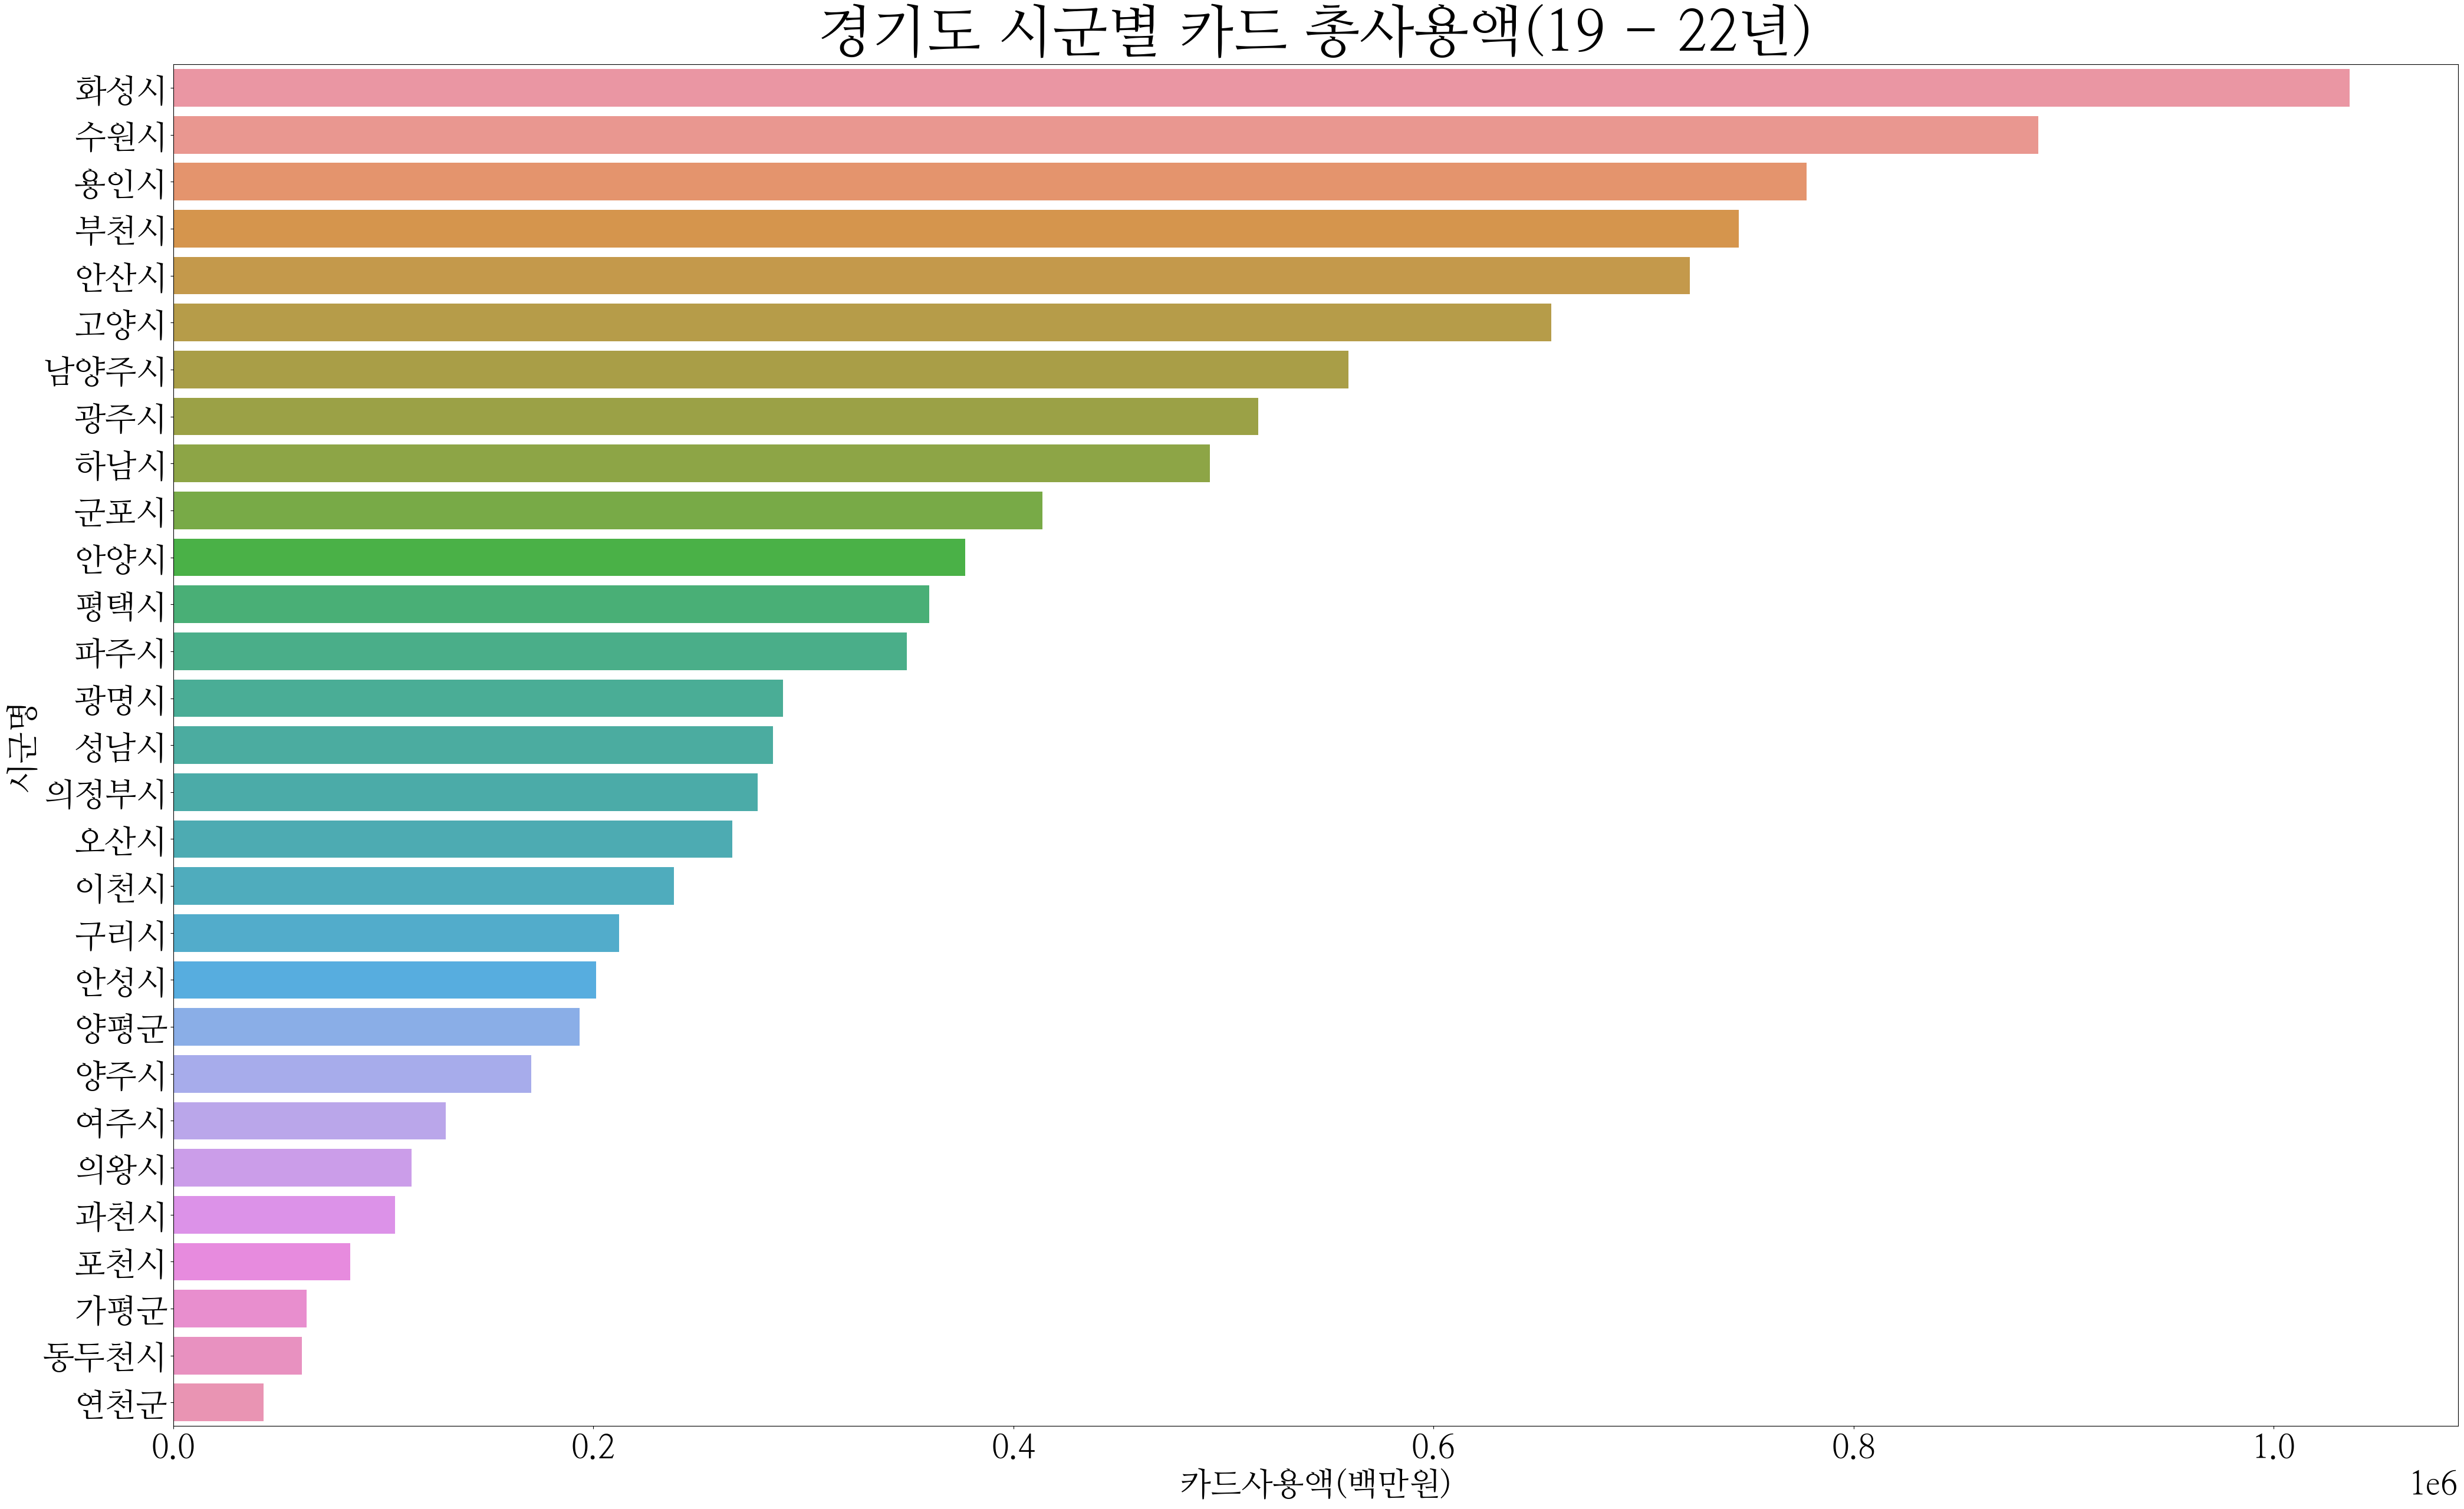

In [33]:
plt.figure(figsize=(50,30))  
plt.rc('font', size=20)
plt.rc('axes', labelsize=40)   
plt.rc('xtick', labelsize=40)   
plt.rc('ytick', labelsize=40)  
plt.xticks(rotation = 0 )
n = 20
data = np.random.normal(loc=0,size=n, scale=500000) + 1000000
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
sns.barplot(data=temp1, x="카드사용액(백만원)", y="시군명") 
plt.title('경기도 시군별 카드 총사용액(19 - 22년)', size=70)
plt.show()


In [34]:
local_g = pd.read_csv('datas/지역화폐발행및이용현황.csv', encoding='CP949', low_memory=False)

In [35]:
local_22 = local_g[local_g['기준년월'] > '2022']  ## 22년도 경기도 자료
local_21 = local_g[local_g['기준년월'] > '2021'] 
local_21 = local_21[local_21['기준년월'] < '2022']  ## 21년도 경기도 자료
local_20 = local_g[local_g['기준년월'] > '2020']
local_20 = local_20[local_20['기준년월'] < '2021']  ## 20년도 경기도 자료
local_19 = local_g[local_g['기준년월'] > '2019']
local_19 = local_19[local_19['기준년월'] < '2020']  ## 19년도 경기도 자료

total_19 = local_19[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()
total_20 = local_20[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()
total_21 = local_21[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()
total_22 = local_22[['월별카드발행수량(건)', '월별카드충전액(천원)', '월별카드사용액(천원)']].sum()

total_19
print(total_21)
total_21

월별카드발행수량(건)    2.657822e+06
월별카드충전액(천원)    3.709852e+09
월별카드사용액(천원)    3.629994e+09
dtype: float64


월별카드발행수량(건)    2.657822e+06
월별카드충전액(천원)    3.709852e+09
월별카드사용액(천원)    3.629994e+09
dtype: float64

In [36]:
# 도시별 년도별 총 사용량으로 나눔
temp3 = local_g1.reset_index()
pivot_temp = pd.pivot_table(temp3,
               index = "시군명",
               columns = "기준년월",
               values = "월별카드사용액(천원)")
pivot_temp

temp4 = pivot_temp.reset_index()
temp4.drop([7, 13], inplace=True)
temp4

기준년월,시군명,2019,2020,2021,2022
0,가평군,1163080.0,7838598.0,17090192.0,37295334.0
1,고양시,28739326.0,165952369.0,227763309.0,233629399.0
2,과천시,3321976.0,18277683.0,34990151.0,48901935.0
3,광명시,6372380.0,52619450.0,102319815.0,128884694.0
4,광주시,7557041.0,75327338.0,169707917.0,264018232.0
5,구리시,4011320.0,35658236.0,67749794.0,104856810.0
6,군포시,16642604.0,74169504.0,142795935.0,180159645.0
8,남양주시,12979396.0,94044048.0,187900637.0,264578012.0
9,동두천시,2106819.0,8998356.0,20767173.0,29409195.0
10,부천시,31543254.0,142099351.0,246942642.0,324609192.0


In [38]:
# 연도별 경기도 자료를 데이터프레임화 시키기

a = pd.DataFrame(total_19)
b = pd.DataFrame(total_20)
c = pd.DataFrame(total_21)
d = pd.DataFrame(total_22)

total = pd.DataFrame([total_19, total_20, total_21, total_22])
total = total.rename({0: '2019년',
              1: '2020년',
              2: '2021년',
              3: '2022년'
             })
total = total.rename({'월별카드발행수량(건)' : '카드발행수량(건)',
              '월별카드충전액(천원)' : '카드충전액(천원)',
              '월별카드사용액(천원)' : '카드사용액(천원)'} , axis=1)

total[['카드충전액(백만원)', '카드사용액(백만원)']] = total[['카드충전액(천원)', '카드사용액(천원)']] / 1000  # 단위가 크기때문에 줄여줌

total.drop(['카드충전액(천원)', '카드사용액(천원)'], axis=1, inplace=True)
total.reset_index(inplace=True)
total.rename({'index': '년도'}, axis=1, inplace=True)
total

,년도,카드발행수량(건),카드충전액(백만원),카드사용액(백만원)
0,2019년,587520.0,419195.293,340616.645
1,2020년,3677667.0,2215826.594,2045833.060
2,2021년,2657822.0,3709852.468,3629993.736
3,2022년,1068714.0,4651126.780,4613520.446


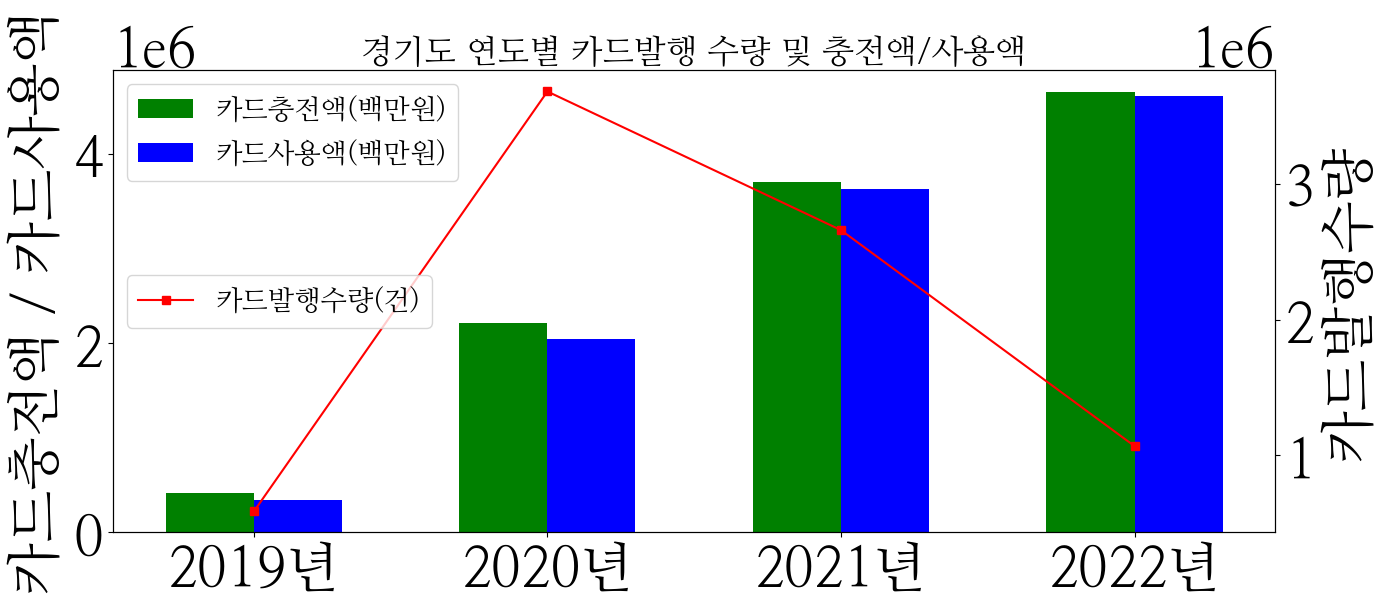

In [41]:

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(15, 6))

n = len(total['년도'].unique())
index = np.arange(n)

bar_width = 0.3
ax1.bar(index - bar_width/2, total['카드충전액(백만원)'], width=bar_width, color='green', label='카드충전액(백만원)')
ax1.bar(index + bar_width/2, total['카드사용액(백만원)'], width=bar_width, color='blue', label='카드사용액(백만원)')
ax1.legend(loc=2)
ax1.set_ylabel('카드충전액 / 카드사용액')
ax2 = ax1.twinx()
ax2.set_xlabel('년도')
ax2.set_ylabel('카드발행수량')
ax2.plot(total['년도'], total['카드발행수량(건)'], marker='s', color='red')
ax2.legend(['카드발행수량(건)'], loc=6)


plt.title('경기도 연도별 카드발행 수량 및 충전액/사용액')
plt.grid(visible = False)

plt.show()

In [44]:
population = pd.read_csv('datas/주민등록인구집계현황.csv', encoding='CP949', low_memory=False)

In [45]:
population['행정구역명'] = population['행정구역명'].str.strip()

In [46]:
# 필요없는 컬럼 삭제
population = population.drop(['월', '0~9세', '10~19세', '20~29세', '30~39세',
       '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상',
       '총 인구수 (남)', '0~9세 (남)', '10~19세 (남)', '20~29세 (남)', '30~39세 (남)',
       '40~49세 (남)', '50~59세 (남)', '60~69세 (남)', '70~79세 (남)', '80~89세 (남)',
       '90~99세 (남)', '100세 이상 (남)', '총 인구수 (여)', '0~9세 (여)', '10~19세 (여)',
       '20~29세 (여)', '30~39세 (여)', '40~49세 (여)', '50~59세 (여)', '60~69세 (여)',
       '70~79세 (여)', '80~89세 (여)', '90~99세 (여)', '100세 이상 (여)'], axis=1)

In [47]:
population

,연도,행정구역구분명,행정구역명,총 인구수
0,2023,도,경기도,13600800
1,2023,시군,경기도 가평군,62069
2,2023,읍면동,경기도 가평군 가평읍,19570
3,2023,읍면동,경기도 가평군 북면,3826
4,2023,읍면동,경기도 가평군 상면,5614
...,...,...,...,...
110587,2008,읍면동,경기도 화성시 팔탄면,9900
110588,2008,읍면동,경기도 화성시 향남읍,21100
110589,2008,읍면동,경기도 화성시 향남읍,21100
110590,2008,읍면동,경기도 화성시 화산동,23684


In [48]:
population = population[population['행정구역구분명'] == '시군']   ## 인구에서 시군으로만 나오게
population

,연도,행정구역구분명,행정구역명,총 인구수
1,2023,시군,경기도 가평군,62069
8,2023,시군,경기도 고양시,1078087
56,2023,시군,경기도 과천시,78526
63,2023,시군,경기도 광명시,286584
83,2023,시군,경기도 광주시,390950
...,...,...,...,...
110497,2008,시군,경기도 포천시,158413
110526,2008,시군,경기도 하남시,137291
110527,2008,시군,경기도 하남시,137291
110548,2008,시군,경기도 화성시,378418


In [49]:
population['행정구역명_2'] = population['행정구역명'].str.split(' ').str[1]  # 행정구역 보기 쉽게
population = population.drop(['행정구역구분명', '행정구역명'], axis=1)
population

C:\Users\jaehee\AppData\Local\Temp\ipykernel_11524\1536567559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['행정구역명_2'] = population['행정구역명'].str.split(' ').str[1]  # 행정구역 보기 쉽게


,연도,총 인구수,행정구역명_2
1,2023,62069,가평군
8,2023,1078087,고양시
56,2023,78526,과천시
63,2023,286584,광명시
83,2023,390950,광주시
...,...,...,...
110497,2008,158413,포천시
110526,2008,137291,하남시
110527,2008,137291,하남시
110548,2008,378418,화성시


In [50]:
population.reset_index(drop = True)

,연도,총 인구수,행정구역명_2
0,2023,62069,가평군
1,2023,1078087,고양시
2,2023,78526,과천시
3,2023,286584,광명시
4,2023,390950,광주시
...,...,...,...
5651,2008,158413,포천시
5652,2008,137291,하남시
5653,2008,137291,하남시
5654,2008,378418,화성시


In [51]:
population = population[population['연도'] >= 2019]

In [52]:
population = population[population['연도'] <= 2022]
population

,연도,총 인구수,행정구역명_2
1247,2022,62197,가평군
1254,2022,1075202,고양시
1302,2022,77775,과천시
1309,2022,288182,광명시
1329,2022,391704,광주시
...,...,...,...
30222,2019,452564,파주시
30241,2019,496324,평택시
30264,2019,150192,포천시
30279,2019,256611,하남시


In [53]:
population.astype({"총 인구수": "int"})

,연도,총 인구수,행정구역명_2
1247,2022,62197,가평군
1254,2022,1075202,고양시
1302,2022,77775,과천시
1309,2022,288182,광명시
1329,2022,391704,광주시
...,...,...,...
30222,2019,452564,파주시
30241,2019,496324,평택시
30264,2019,150192,포천시
30279,2019,256611,하남시


In [59]:
# use = temp1.drop(['월별모바일상품권이용등록자수(명)', '월별모바일충전액(천원)', '월별모바일사용액(천원)', '월별지류상품권판매액(천원)', '월별지류상품권회수액(천원)'], axis=1)
use = temp1.sort_values('시군명') 


In [60]:
pivot_temp1 = pd.pivot_table(population,
               index = "행정구역명_2",
               columns = "연도",
               values = "총 인구수",
               aggfunc = 'mean' )

# 필요 없는 행정구역 삭제
a = pivot_temp1.reset_index()
a.drop([17, 30, 33], axis=0, inplace=True)
a.set_index('행정구역명_2')


a['인구평균'] = a.mean(axis='columns')


pop_means = a.drop([2019, 2020, 2021, 2022], axis=1)  # 행정구역 별 인구 평균

pop_means 

pop_means['인구비율'] = pop_means["인구평균"]/pop_means["인구평균"].sum()*100


C:\Users\jaehee\AppData\Local\Temp\ipykernel_11524\2644235030.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a['인구평균'] = a.mean(axis='columns')


In [61]:
pop_means = pop_means.drop([7, 13], axis=0)


In [62]:
pop_means = pop_means.set_index('행정구역명_2')

In [63]:
use['temp'] = use['카드사용액(백만원)'] / use['카드사용액(백만원)'].sum()*100
use = use.set_index('시군명')

In [64]:
pop_means['총사용액'] = use['카드사용액(백만원)']
pop_means['사용비율'] = pop_means['총사용액']/pop_means["총사용액"].sum()*100
pop_means

연도,인구평균,인구비율,총사용액,사용비율
행정구역명_2,,,,
가평군,6.243416e+04,0.478674,63387.204,0.596307
고양시,1.050240e+06,8.052036,656084.403,6.172029
과천시,6.522515e+04,0.500072,105491.745,0.992400
광명시,3.042099e+05,2.332334,290196.339,2.729984
광주시,3.398383e+05,2.605491,516610.528,4.859946
구리시,1.925155e+05,1.475989,212276.160,1.996960
군포시,2.561661e+05,1.963988,413767.688,3.892466
남양주시,7.151947e+05,5.483294,559502.093,5.263443
동두천시,9.214467e+04,0.706460,61281.543,0.576498


In [65]:
pop_means=pop_means.reset_index()

In [66]:
#3.인구비율과 지역화폐 결제금액 비율을 동시에 시각화

pop_df = pop_means[["행정구역명_2", "인구비율","사용비율"]]  
pop_df = pop_df.set_index("행정구역명_2") 

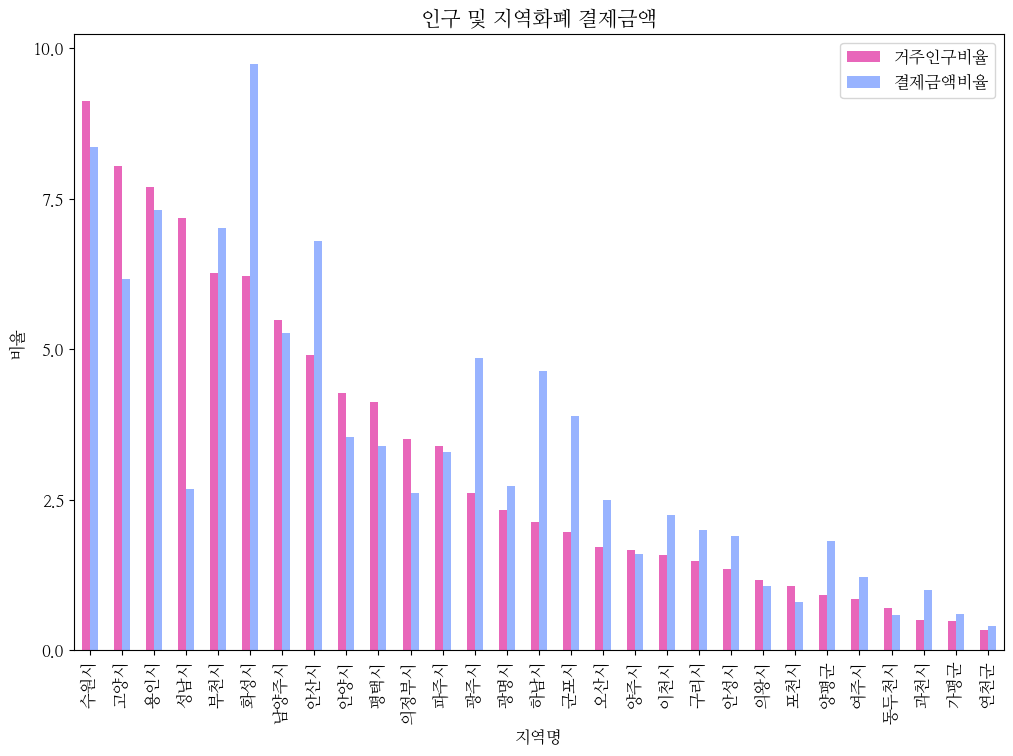

<Figure size 640x480 with 0 Axes>

In [76]:
# 시군구별 인구 및 지역화폐 결재금액 시각화
ax=pop_df.sort_values(by='인구비율', ascending=False).plot(kind='bar', figsize=(12, 8), legend=True, fontsize=12, color=['#E866BA','#98B3FF']) 
current_values = plt.gca().get_xticks()
plt.gca().get_xticklabels(['{:,.0f}'.format(x) for x in current_values])
ax.set_xlabel('지역명', fontsize=12) 
ax.set_ylabel('비율', fontsize=12) 
plt.title("인구 및 지역화폐 결제금액", fontsize=15)
ax.legend(['거주인구비율', '결제금액비율'], fontsize=12)
plt.show()

plt.savefig('인구 및 지역화폐 결제금액')

In [317]:
# 인구평균과 총사용액 

pop_df2 = pop_means[["행정구역명_2", "인구평균","총사용액"]]  


pop_df2 = pop_df2.set_index('행정구역명_2')
pop_df2

연도,인구평균,총사용액
행정구역명_2,,
가평군,6.243416e+04,63387.204
고양시,1.050240e+06,656084.403
과천시,6.522515e+04,105491.745
광명시,3.042099e+05,290196.339
광주시,3.398383e+05,516610.528
구리시,1.925155e+05,212276.160
군포시,2.561661e+05,413767.688
남양주시,7.151947e+05,559502.093
동두천시,9.214467e+04,61281.543


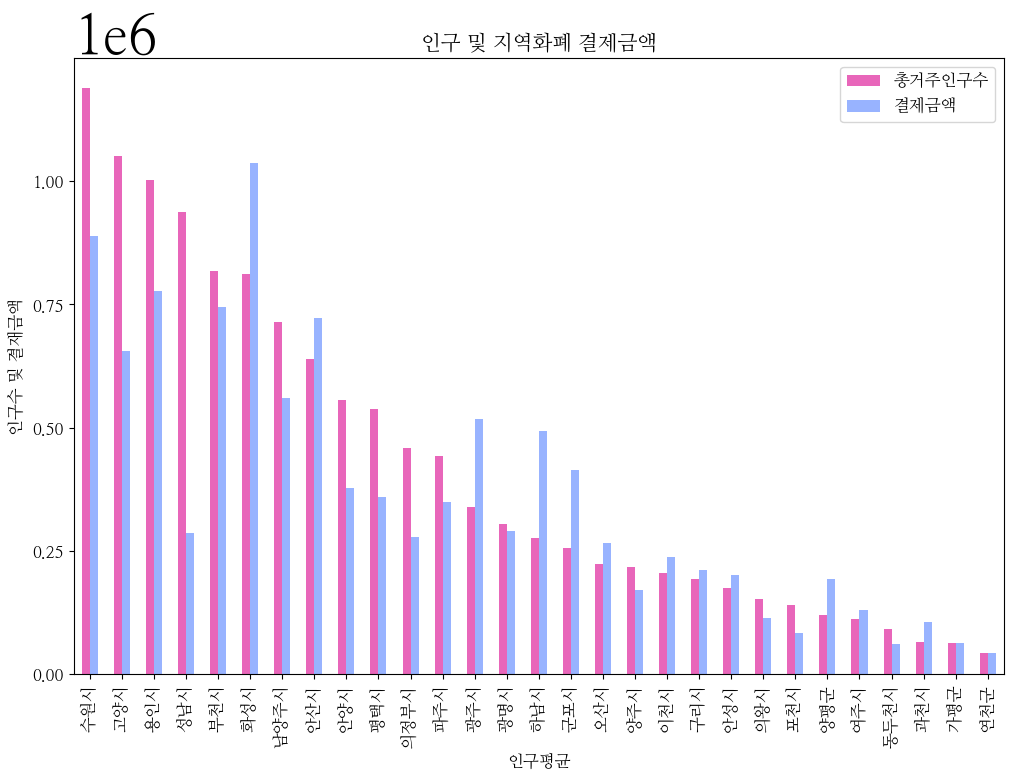

In [325]:
ax=pop_df2.sort_values(by='인구평균', ascending=False).plot(kind='bar', figsize=(12, 8), legend=True, fontsize=12, color=['#E866BA','#98B3FF']) 
ax.set_xlabel('인구평균', fontsize=12) 
ax.set_ylabel('인구수 및 결재금액', fontsize=12) 
plt.title("인구 및 지역화폐 결제금액", fontsize=15)
ax.legend(['총거주인구수', '결제금액'], fontsize=12) 